In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
baseline = {
    "gen": None,
    "disc": None
}

shared = {
    "gen": None  # Discriminator is same as generator
}

baseline["gen"] = np.load("completed/weights/baseline_generator.pkl")
baseline["disc"] = np.load("completed/weights/baseline_discriminator.pkl")

shared["gen"] = np.load("completed/weights/shared_discriminator.pkl")

shared architecture


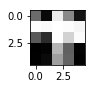

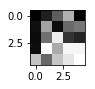

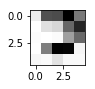

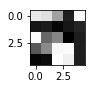

discriminator


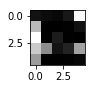

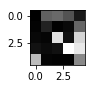

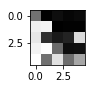

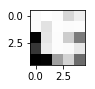

baseline gen


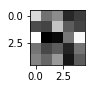

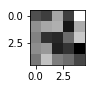

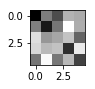

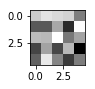

In [4]:
print "shared architecture"

plt.rcParams['figure.figsize'] = (1.25, 1)

plt.imshow(shared["gen"][:, :, 0, 0])
plt.show()
plt.imshow(shared["gen"][:, :, 0, 1])
plt.show()
plt.imshow(shared["gen"][:, :, 0, 2])
plt.show()
plt.imshow(shared["gen"][:, :, 0, 3])
plt.show()

print "discriminator"
plt.imshow(baseline["disc"][:, :, 0, 0])
plt.show()
plt.imshow(baseline["disc"][:, :, 0, 1])
plt.show()
plt.imshow(baseline["disc"][:, :, 0, 2])
plt.show()
plt.imshow(baseline["disc"][:, :, 0, 3])
plt.show()

print "baseline gen"
plt.imshow(baseline["gen"][:, :, 0, 0])
plt.show()
plt.imshow(baseline["gen"][:, :, 0, 1])
plt.show()
plt.imshow(baseline["gen"][:, :, 0, 2])
plt.show()
plt.imshow(baseline["gen"][:, :, 0, 3])
plt.show()

In [7]:
def get_similarity(sim_1, sim_2):
    a = sim_1
    b = sim_2

    print a.shape
    print b.shape

    similarity = []

    for x1 in range(a.shape[2]):
        print x1+1,"/",a.shape[2]
        for y1 in range(a.shape[3]):
            sim_local = []
            for x2 in range(b.shape[2]):
                for y2 in range(b.shape[3]):
                    x_vector = a[:, :, x1, y1].reshape([5, 5])
                    y_vector = b[:, :, x2, y2].reshape([5, 5])

                    x_vector = x_vector/np.linalg.norm(x_vector)
                    y_vector = y_vector/np.linalg.norm(y_vector)

                    sim = np.sum(x_vector * y_vector)

                    sim_local.append(sim)
            
            similarity.append(np.max(sim_local))
    return similarity

(5, 5, 64, 64)
(5, 5, 64, 64)
1 / 64
2 / 64
3 / 64
4 / 64
5 / 64
6 / 64
7 / 64
8 / 64
9 / 64
10 / 64
11 / 64
12 / 64
13 / 64
14 / 64
15 / 64
16 / 64
17 / 64
18 / 64
19 / 64
20 / 64
21 / 64
22 / 64
23 / 64
24 / 64
25 / 64
26 / 64
27 / 64
28 / 64
29 / 64
30 / 64
31 / 64
32 / 64
33 / 64
34 / 64
35 / 64
36 / 64
37 / 64
38 / 64
39 / 64
40 / 64
41 / 64
42 / 64
43 / 64
44 / 64
45 / 64
46 / 64
47 / 64
48 / 64
49 / 64
50 / 64
51 / 64
52 / 64
53 / 64
54 / 64
55 / 64
56 / 64
57 / 64
58 / 64
59 / 64
60 / 64
61 / 64
62 / 64
63 / 64
64 / 64


(array([   1.,    2.,   24.,   60.,  134.,  269.,  329.,  440.,  529.,
         535.,  490.,  433.,  295.,  251.,  128.,   91.,   42.,   27.,
          10.,    6.]),
 array([ 0.45530802,  0.47530003,  0.49529205,  0.51528406,  0.53527608,
         0.55526809,  0.57526011,  0.59525212,  0.61524414,  0.63523615,
         0.65522817,  0.67522018,  0.6952122 ,  0.71520421,  0.73519623,
         0.75518824,  0.77518026,  0.79517227,  0.81516429,  0.8351563 ,
         0.85514832]),
 <a list of 20 Patch objects>)

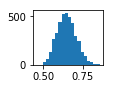

In [8]:
sim = get_similarity(baseline["gen"], baseline["disc"])

plt.hist(sim, bins=20)

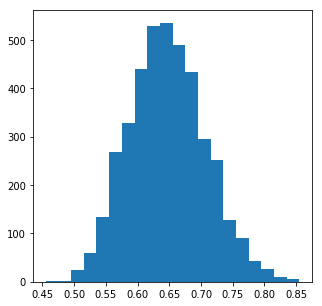

In [10]:
plt.rcParams['figure.figsize'] = (5, 5)

plt.hist(sim, bins=20)
plt.show()

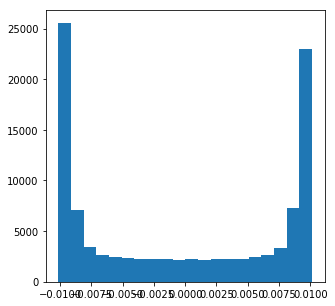

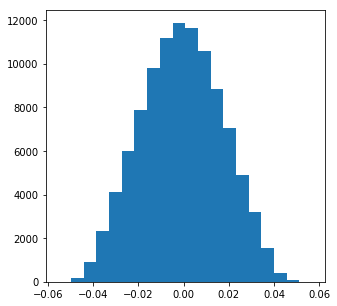

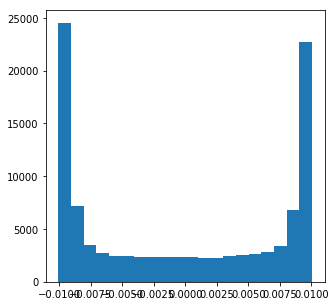

In [16]:
plt.hist(shared["gen"].flatten(), bins=20)
plt.show()

plt.hist(baseline["gen"].flatten(), bins=20)
plt.show()

plt.hist(baseline["disc"].flatten(), bins=20)
plt.show()